In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [15]:
#construct a cnn model with pytorch
class MinistNet(nn.Module):
    def __init__(self):
        super(MinistNet, self).__init__()
        #two convolution layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)#1 input channel,10 output channels, kernel 5*5 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)#maxpooling layver
        self.fc = nn.Linear(320, 10) # fully connect layer

    def forward(self, x):
        in_size = x.size(0) # in_size = 64 per batch   
        x = F.relu(self.mp(self.conv1(x)))# x: 64*10*12*12      
        x = F.relu(self.mp(self.conv2(x)))# x: 64*20*4*4
        x = x.view(in_size, -1) # flatten the tensor,x: 64*320      
        x = self.fc(x) # x: 64*10
        return F.log_softmax(x)

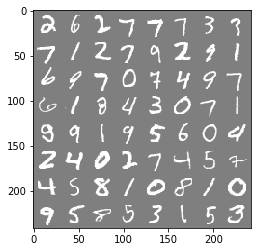

In [16]:
# laod MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',train=True, transform=transforms.ToTensor(),download=True)
test_dataset = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))

In [18]:
#define model and optimizer
MNet = MinistNet()
optimizer = optim.SGD(MNet.parameters(), lr=0.01, momentum=0.5)#define optimizer
#training
running_loss = 0.0
for epoch in range(1, 10):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = MNet(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if batch_idx % 200 == 0:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 200))
            running_loss = 0.0
            
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = MNet(data)
    # sum up batch loss
    test_loss += F.nll_loss(output, target, size_average=False).data[0]
    # get the index of the max log-probability
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[2,     1] loss: 0.011
[2,   201] loss: 1.689
[2,   401] loss: 0.428
[2,   601] loss: 0.313
[2,   801] loss: 0.234
[3,     1] loss: 0.145
[3,   201] loss: 0.176
[3,   401] loss: 0.151
[3,   601] loss: 0.159
[3,   801] loss: 0.138
[4,     1] loss: 0.085
[4,   201] loss: 0.115
[4,   401] loss: 0.111
[4,   601] loss: 0.104
[4,   801] loss: 0.107
[5,     1] loss: 0.072
[5,   201] loss: 0.097
[5,   401] loss: 0.087
[5,   601] loss: 0.101
[5,   801] loss: 0.087
[6,     1] loss: 0.054
[6,   201] loss: 0.078
[6,   401] loss: 0.082
[6,   601] loss: 0.079
[6,   801] loss: 0.077
[7,     1] loss: 0.053
[7,   201] loss: 0.073
[7,   401] loss: 0.070
[7,   601] loss: 0.075
[7,   801] loss: 0.071
[8,     1] loss: 0.048
[8,   201] loss: 0.063
[8,   401] loss: 0.068
[8,   601] loss: 0.066
[8,   801] loss: 0.063
[9,     1] loss: 0.048
[9,   201] loss: 0.061
[9,   401] loss: 0.061
[9,   601] loss: 0.066
[9,   801] loss: 0.063
[10,     1] loss: 0.039
[10,   201] loss: 0.059
[10,   401] loss: 0.061
[10,   6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0002, Accuracy: 64/10000 (0%)


Test set: Average loss: 0.0001, Accuracy: 128/10000 (1%)


Test set: Average loss: 0.0001, Accuracy: 192/10000 (1%)


Test set: Average loss: 0.0004, Accuracy: 255/10000 (2%)


Test set: Average loss: 0.0002, Accuracy: 318/10000 (3%)


Test set: Average loss: 0.0005, Accuracy: 380/10000 (3%)


Test set: Average loss: 0.0004, Accuracy: 443/10000 (4%)


Test set: Average loss: 0.0003, Accuracy: 506/10000 (5%)


Test set: Average loss: 0.0002, Accuracy: 569/10000 (5%)


Test set: Average loss: 0.0006, Accuracy: 630/10000 (6%)


Test set: Average loss: 0.0006, Accuracy: 692/10000 (6%)


Test set: Average loss: 0.0002, Accuracy: 755/10000 (7%)


Test set: Average loss: 0.0001, Accuracy: 819/10000 (8%)


Test set: Average loss: 0.0002, Accuracy: 882/10000 (8%)


Test set: Average loss: 0.0005, Accuracy: 943/10000 (9%)


Test set: Average loss: 0.0007, Accuracy: 1005/10000 (10%)


Test set: Average loss: 0.0005, Accuracy: 1067/10000 (


Test set: Average loss: 0.0000, Accuracy: 9199/10000 (91%)


Test set: Average loss: 0.0000, Accuracy: 9263/10000 (92%)


Test set: Average loss: 0.0000, Accuracy: 9327/10000 (93%)


Test set: Average loss: 0.0000, Accuracy: 9391/10000 (93%)


Test set: Average loss: 0.0001, Accuracy: 9455/10000 (94%)


Test set: Average loss: 0.0005, Accuracy: 9518/10000 (95%)


Test set: Average loss: 0.0007, Accuracy: 9578/10000 (95%)


Test set: Average loss: 0.0011, Accuracy: 9639/10000 (96%)


Test set: Average loss: 0.0003, Accuracy: 9702/10000 (97%)


Test set: Average loss: 0.0005, Accuracy: 9763/10000 (97%)


Test set: Average loss: 0.0002, Accuracy: 9827/10000 (98%)


Test set: Average loss: 0.0000, Accuracy: 9843/10000 (98%)

